## ARE CORRECT ANSWERS ON MULTIPLE CHOICE TESTS EVENLY DISTRIBUTED?

### INTRODUCTION
When testwriters of multiple choice exams manually select which answer choice the correct answer should be assigned to (A,B,C,D or 1,2,3,4), there is often a bias towards certain answer choices. For example, this analyst has seen multiple choice exams in which the answer was never 'b' due to the testwriter's innate bias. On another exam, the answer was "d" for half of the questions. This can lead to students detecting patterns and 'hacking the test.' To create a fair exam, testwriters should ensure that there is some degree of equal distribution among answer choices. This can be achieved using a randomizing mechanism to select which answer choice will be assigned the correct answer. 

Choosing randomly will eventually produce an even distribution due to the Law of Large Numbers -- each choice has an equal probability of succeeding, so eventually the results converge to an even distribution.
                 
In this project, we'll investigate whether this is actually the protocol testwriters on standardized exams follow. 

The data we'll use comes from the answer keys of two real New York State standardized exams -- one English (English Regents Exam) and one math (Algebra 2 Regents Exam). We'll also leverage Pandas to generate a set of fourteen 24-question mock exam answer keys (which we'll call 'randomset') so we can compare to the real data a set of data we know to be randomly generated.

### 1 - GETTING THE DATA
First, we'll import the pandas and numpy libraries. 

Then we'll load our real test data. There are a total of 28 different exams, 14 for each subject. Each exam has its own index. There are 24 multiple choice questions per exam. 

In [78]:
import pandas as pd
import numpy as np
realdf = pd.read_csv("https://raw.githubusercontent.com//NickKrausStack//testrandomness//main//AnswerKeyMaster.csv")
realdf.index += 1
realdf.index.name = 'Questions'
print(realdf)

           TestID TestName  Answer
Questions                         
1               1     Math       4
2               1     Math       3
3               1     Math       2
4               1     Math       3
5               1     Math       3
...           ...      ...     ...
668            28  English       4
669            28  English       4
670            28  English       3
671            28  English       1
672            28  English       4

[672 rows x 3 columns]


In the dataframe, each row represents one question, with the actual multiple choice answer in the last column. The multiple choice questions each have 4 choices -- 1, 2, 3, and 4. 

Now, for comparison, we'll generate a randomized data set of answer choices for fictional tests. The data will be formatted in the same way as the real data was, with 'randomset' for the name of the test. 

For convenience, we'll combine them into the same dataframe.

In [79]:
ids = np.repeat(np.arange(29, 43), 24)
random_numbers = np.random.randint(1, 5, size=len(ids))
gendf = pd.DataFrame({'TestID': ids, 'TestName':"randomset",'Answer': random_numbers})
combined_df = pd.concat([realdf, gendf], ignore_index=True)
combined_df.index += 1
combined_df.index.name = 'QuestionID'

Here's how the combined dataframe looks:

In [80]:
print(combined_df)

            TestID   TestName  Answer
QuestionID                           
1                1       Math       4
2                1       Math       3
3                1       Math       2
4                1       Math       3
5                1       Math       3
...            ...        ...     ...
1004            42  randomset       3
1005            42  randomset       2
1006            42  randomset       2
1007            42  randomset       2
1008            42  randomset       3

[1008 rows x 3 columns]


## 2 - TESTING THE AVERAGE ANSWER VALUE OF EACH EXAM
If an exam's answers are equally distributed, the average of all answers should be 2.5. This is because the average of 1,2,3, and 4 is 2.5. 

To check each individual exam for its answer value average, we'll create a new dataframe called avgdf. We'll populate it by using a custom function, take_avg:

In [81]:
avgdf = pd.DataFrame(columns=['TestName','avg'])

def take_avg(x):
    tests = x['TestID'].unique().tolist()
    for test in tests:
        filter = x.loc[(x['TestID']==test)]
        filtered = filter['Answer']
        name = filter['TestName'].unique().item()
        countt = name
        avg = filtered.mean()
        avgdf.loc[len(avgdf)] = [name, avg]
    avgdf.index += 1
    avgdf.index.name = 'QuestionID'
    print(avgdf)
    
take_avg(combined_df)

             TestName       avg
QuestionID                     
1                Math  2.666667
2                Math  2.416667
3                Math  2.416667
4                Math  2.541667
5                Math  2.500000
6                Math  2.708333
7                Math  2.583333
8                Math  2.791667
9                Math  2.375000
10               Math  2.666667
11               Math  2.541667
12               Math  2.375000
13               Math  2.583333
14               Math  2.416667
15            English  2.416667
16            English  2.458333
17            English  2.416667
18            English  2.625000
19            English  2.333333
20            English  2.500000
21            English  2.500000
22            English  2.416667
23            English  2.458333
24            English  2.625000
25            English  2.500000
26            English  2.583333
27            English  2.375000
28            English  2.625000
29          randomset  2.750000
30      

Glancing through the third column, it seems like most exams are in the vicinity of 2.5. Among the real exams, 2 of them had a perfect distribution of 2.5. Among the Pandas-Generated exams, there were also 2 that had the perfect distribution. In the randomized data, there is one exam (#41) that has a value average of 2.95 and one that has an average of 2.04 (#38). None of the real exams had value averages close to that. We see here the possibility that randomization can sometimes skew results on a specific exam, even though, among a series of exams, the average will converge to equal distribution.

## 3 - VISUALIZATION: HISTOGRAM SUBPLOT
To visualize, we'll import matplotlib (and use numpy) to construct histograms in a subplot for each test -- the math, the English, and the randomly-generated. We'll loop through a list of these exams to create each histogram, in succession.

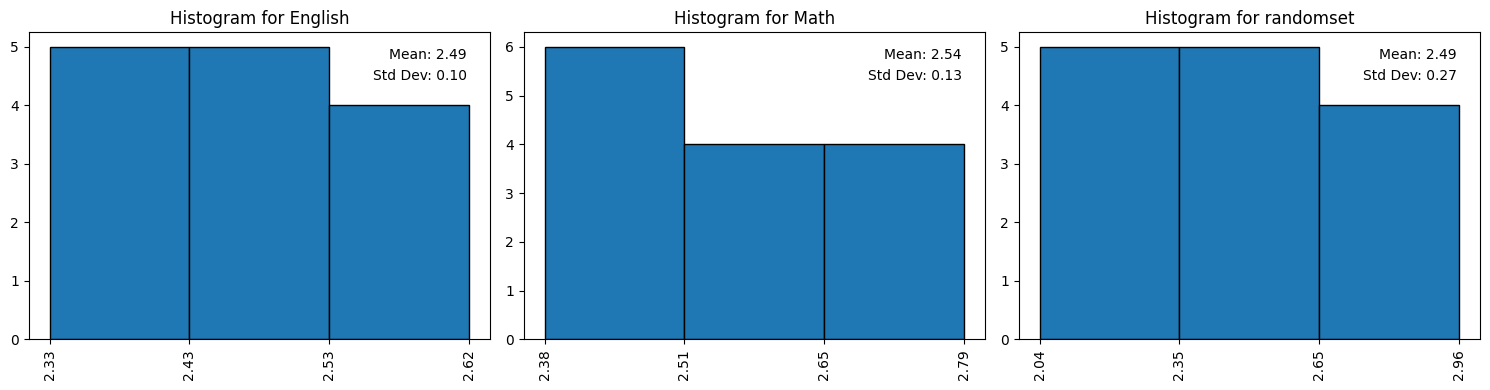

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
exams = ['English','Math' , 'randomset']
    
for var in range(len(exams)):
    filtdf = avgdf.loc[avgdf['TestName'] == exams[var], 'avg']
    n, bins, patches = axes[var].hist(filtdf, bins=3, edgecolor='black')
    axes[var].set_title('Histogram for ' + exams[var])
    axes[var].set_xticks(bins)
    axes[var].set_xticklabels(np.around(bins, decimals=2), rotation=90, ha='center')
    
    mean = filtdf.mean()
    std = filtdf.std()
    axes[var].text(0.95, 0.95, f"Mean: {mean:.2f}", ha='right', va='top', transform=axes[var].transAxes)
    axes[var].text(0.95, 0.88, f"Std Dev: {std:.2f}", ha='right', va='top', transform=axes[var].transAxes)

plt.tight_layout()
plt.show()

All exams are in the vicinity of 2.5. But notice that the Pandas-Generated answer key has a much wider standard deviation, indicating that there is more variability among exams. This is what we saw in the table, where the Pandas answer key produced one test with an average of 2.0 and another with an average of 2.95 -- far from the mean.

## 4 - VISUALIZATION: LINE PLOT
To visualize the data a different way, we can track each test's cumulative average and observe how long it takes for the data to converge to the 2.5 vicinity. 

We'll visualize the results in a line graph, with each test side by side in a subplot. We can illustrate the overall trend of each exam using line of best fit. We'll need numpy for this.

And we'll again use a for-loop to generate graphs for each of the exams.

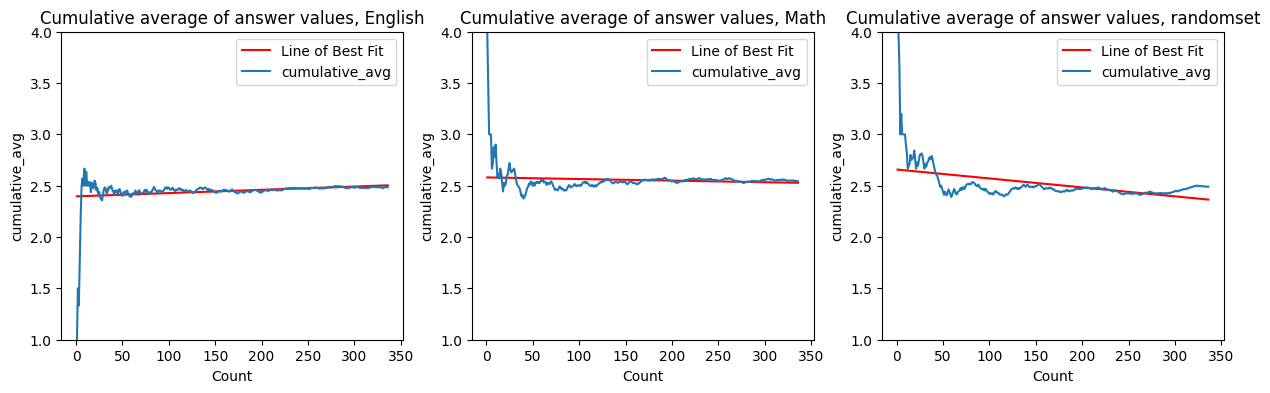

In [85]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
exams = ['English','Math' , 'randomset']


for var in range(len(exams)):
    filtdf = pd.DataFrame()
    filtdf['Answer'] = combined_df.loc[combined_df['TestName'] == exams[var], 'Answer']
    filtdf['Count'] = range(1, len(filtdf) + 1)
    filtdf['cumulative_avg'] = filtdf['Answer'].cumsum() / np.arange(1, len(filtdf) + 1)
    coefficients = np.polyfit(filtdf['Count'], filtdf['cumulative_avg'], deg=1)
    m = coefficients[0]  
    b = coefficients[1] 
    line_of_best_fit = m * filtdf['Count'] + b
    axes[var].plot(filtdf['Count'], line_of_best_fit, color='red', label='Line of Best Fit')
    axes[var].plot('Count', 'cumulative_avg', data=filtdf)
    axes[var].set_xlabel('Count')
    axes[var].set_ylabel('cumulative_avg')
    axes[var].set_title('Cumulative average of answer values, '+ exams[var])
    axes[var].set_ylim(1, 4) 
    axes[var].legend()
    
plt.show()        

In all cases, the data settles into the 2.5 vicinity as the sample gets bigger. However, the line of best fit from the Pandas-generated answer key is visibly more skewed than the real tests, showing more variability. 

## CONCLUSION
The data we have of the English and math exams demonstrates that, in fact, some sufficient distribution mechanism was likely used to determine which answer choice should be assigned the correct answer. Was a randomizing mechanism such as Pandas used? Perhaps not. The 'truly random answer key we generated with Pandas suggested that, although in the long run randomization is a good way to achieve relatively equal distribution, it can also produce skewed results on individual tests. It seems very likely that testwriters would use manual means to ensure that the answers are reasonably distributed on each test.